## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "./Mouse_metadata.csv"
study_results_path = "./Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_complete_df = pd.merge(mouse_metadata, study_results, how="inner", on=["Mouse ID"])
# Display the data table for preview
data_complete_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
data_complete_df.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [3]:
# Checking the number of mice.
number_of_dup_mice_df = data_complete_df["Mouse ID"].count()
print("Duplicates:", number_of_dup_mice_df)

number_mice_count_df = data_complete_df["Mouse ID"].nunique()
print("Number of Mice:", number_mice_count_df)


Duplicates: 1893
Number of Mice: 249


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
number_of_dup_mice_df = data_complete_df.groupby("Mouse ID")["Timepoint"].nunique()
number_of_dup_mice_df

combined_data_df = data_complete_df.drop_duplicates(subset="Mouse ID", keep="last")

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 



In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [7]:
# Checking the number of mice in the clean DataFrame.
print(number_mice_count_df)
combined_data_df.head()

249


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean_tumor = combined_data_df.groupby(['Drug Regimen']).mean()["Tumor Volume (mm3)"]
median_tumor = combined_data_df.groupby(['Drug Regimen']).median()["Tumor Volume (mm3)"]
variance_tumor = combined_data_df.groupby(['Drug Regimen']).var()["Tumor Volume (mm3)"]
std_tumor = combined_data_df.groupby(['Drug Regimen']).std()["Tumor Volume (mm3)"]
sem_tumor = combined_data_df.groupby(['Drug Regimen']).sem()["Tumor Volume (mm3)"]




In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_table_df =pd.DataFrame({'Mean of Tumor Volume':mean_tumor,
                          'Median of Tumor Volume':median_tumor,
                          'Variance of Tumor Volume':variance_tumor,
                          'STD of Tumor Volume':std_tumor,
                          'SEM of Tumor Volume': sem_tumor})

summary_stats_table_df.round(2)

,Mean of Tumor Volume,Median of Tumor Volume,Variance of Tumor Volume,STD of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,36.67,38.13,32.66,5.72,1.14
Ceftamin,57.75,59.85,69.98,8.37,1.67
Infubinol,58.18,60.17,74.01,8.60,1.72
Ketapril,62.81,64.49,98.92,9.95,1.99
Naftisol,61.21,63.28,106.03,10.30,2.06
Placebo,60.51,62.03,78.76,8.87,1.77
Propriva,56.74,55.84,69.35,8.33,1.67
Ramicane,36.19,36.56,32.17,5.67,1.13
Stelasyn,61.00,62.19,90.33,9.50,1.94


## Bar and Pie Charts

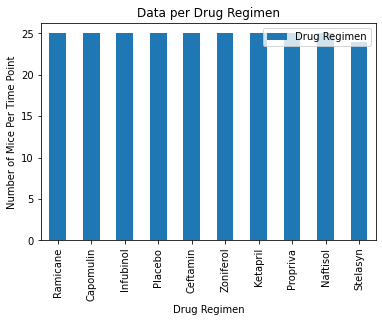

<Figure size 432x288 with 0 Axes>

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drugs_total = pd.DataFrame(pd.value_counts(combined_data_df["Drug Regimen"]))

%matplotlib inline
# pandas plot
drugs_total.plot(kind = "bar")
plt.title("Data per Drug Regimen")
plt.ylabel("Number of Mice Per Time Point")
plt.xlabel("Drug Regimen")
plt.show()
plt.tight_layout()


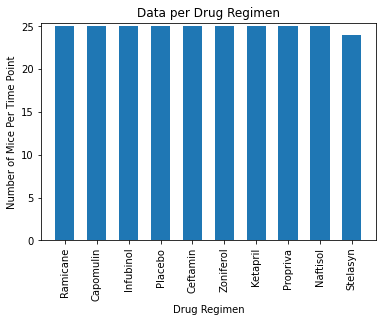

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = combined_data_df["Drug Regimen"].value_counts().index
y_axis = combined_data_df["Drug Regimen"].value_counts()
plt.bar(x_axis,y_axis, width = .6)
plt.xticks(x_axis, rotation = 90)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(y_axis)+0.4)
plt.ylabel("Number of Mice Per Time Point")
plt.xlabel("Drug Regimen")
plt.title("Data per Drug Regimen")
plt.show()


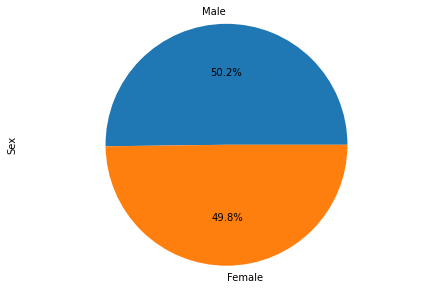

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_total = pd.value_counts(combined_data_df['Sex'])


gender_pandas = gender_total.plot(kind="pie", y="sex", autopct='%1.1f%%')
gender_pandas.set_ylabel("Sex")

plt.tight_layout()
plt.axis("equal")
plt.show()


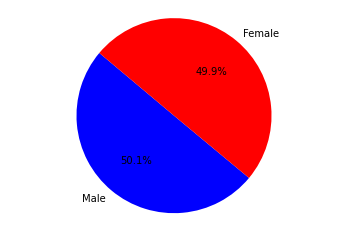

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sizes = [325, 324]
plt.pie(
    sizes, 
    labels=["Male","Female"],          
    colors=["blue","red"],
    autopct='%1.1f%%',                                         
    startangle=140
)


plt.axis("equal")

plt.show()


## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
summary_stats_table_assort_df = summary_stats_table_df.sort_values("Mean of Tumor Volume", ascending=True)
summary_stats_table_assort_df

,Mean of Tumor Volume,Median of Tumor Volume,Variance of Tumor Volume,STD of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308
Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
Propriva,56.736964,55.841410,69.349002,8.327605,1.665521
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
Zoniferol,59.181258,61.840058,76.862027,8.767099,1.753420
Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

NameError: name 'x_axisC' is not defined

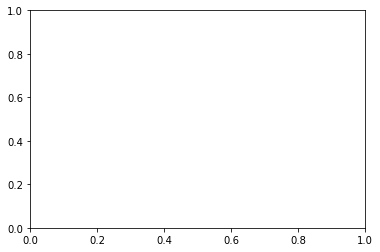

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.boxplot([x_axisC, x_axisR, x_axisP, x_axisCe])
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xticklabels(["Capomulin", "Ramicane", "Propriva", "Ceftamin"])
plt.show()

## Line and Scatter Plots

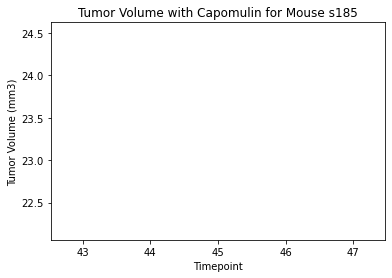

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
x_axis =combined_data_df.loc[combined_data_df["Mouse ID"]== "s185"]
x_axis = x_axis["Timepoint"]

y_axis =combined_data_df.loc[combined_data_df["Mouse ID"]== "s185"]
y_axis = y_axis["Tumor Volume (mm3)"]

plt.plot(x_axis, y_axis)
plt.title("Tumor Volume with Capomulin for Mouse s185")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

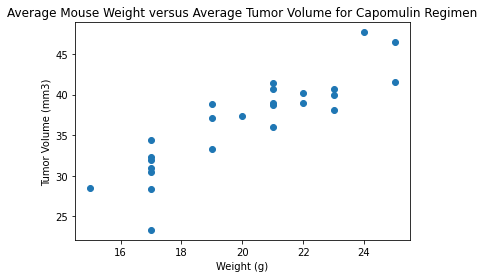

In [23]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mouse_weight_capomulin = combined_data_df.loc[combined_data_df["Drug Regimen"]== "Capomulin"]
mouse_weight_capomulin

mouse_weight = mouse_weight_capomulin["Weight (g)"]
tumor_volume = mouse_weight_capomulin["Tumor Volume (mm3)"]
plt.scatter(mouse_weight, tumor_volume)
plt.title("Average Mouse Weight versus Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [25]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = combined_data_df.pearsonr(mouse_weight, tumor_volume)
print(f"The correlation between both weight and tumor volume is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(mouse_weight, tumor_volume)
regress_values = slope * mouse_weight + intercept
plt.scatter(mouse_weight, tumor_volume)
plt.plot(mouse_weight, regress_values, "--", color="r")
plt.title("Average Mouse Weight versus Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

AttributeError: 'DataFrame' object has no attribute 'pearsonr'